## Lesson 2: Classification Problem

In [6]:
#churn dataset
import pandas as pd

churn_df = pd.read_csv('data/telecom_churn_clean.csv', index_col = 0)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Example 1: k-Nearest Neighbors: Fit**
In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The target, "churn", needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into numpy arrays.
Instructions

- Import KNeighborsClassifier from sklearn.neighbors.
- Instantiate a KNeighborsClassifier called knn with 6 neighbors.
- Fit the classifier to the data using the .fit() method.

In [8]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

**Example 2: k-Nearest Neighbors: Predict**
Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.
The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:


X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])


Create y_pred by predicting the target values of the unseen features X_new.
Print the predicted labels for the set of predictions.


In [9]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for X_new
y_pred = knn.predict(X_new)  

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


## Lesson 3: Model Performance

**Exercise 1: Train/test split + computing accuracy**
It's time to practice splitting your data into training and test sets with the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y.


- Import train_test_split from sklearn.model_selection.
- Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
- Fit the knn model to the training data.
- Compute and print the model's accuracy for the test data.

In [11]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate the model (you already had this line)
knn = KNeighborsClassifier(n_neighbors=5) 

# Fit the classifier to the training data
knn.fit(X_train, y_train) 

# Print the accuracy
print(knn.score(X_test, y_test)) 

0.8740629685157422


**Exercise 2: Overfitting and underfitting**
Interpreting model complexity is a great way to evaluate supervised learning performance. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

- Create neighbors as a numpy array of values from 1 up to and including 12.
- Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
- Fit the model to the training data.
- Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.

In [12]:
# Create neighbors
neighbors = np.arange(1, 13)  
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train) 
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train) 
    test_accuracies[neighbor] = knn.score(X_test, y_test) 

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


**Exercise 3: Visualizing model complexity**
Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

- Add a title "KNN: Varying Number of Neighbors".
- Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
- Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
- Display the plot.

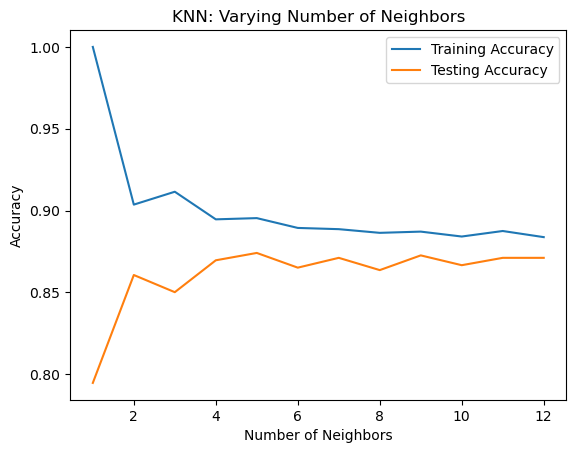

In [14]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Extra Example 1: Iris

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [35]:
# Load the iris dataset
# The iris dataset is a built-in dataset in scikit-learn
# It contains measurements of iris flowers and their corresponding species
iris = load_iris()

# Create a DataFrame from the iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species of iris)

# Split the data into training and testing sets
# train_test_split randomly splits the data into training and testing subsets
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a KNN classifier object
# n_neighbors=5 specifies that we want to use 5 nearest neighbors for classification
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier using the training data
# fit() method trains the classifier on the training features (X_train) and labels (y_train)
knn.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
# predict() method predicts the labels for the testing features (X_test)
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
# accuracy_score() compares the predicted labels (y_pred) with the true labels (y_test)
# and returns the fraction of correctly classified samples
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(accuracy)

0.9333333333333333


In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(1, 11)) }
grid = GridSearchCV(knn, param_grid, cv=5) 
grid.fit(X_train, y_train)
print(grid.best_params_) 

{'n_neighbors': 5}


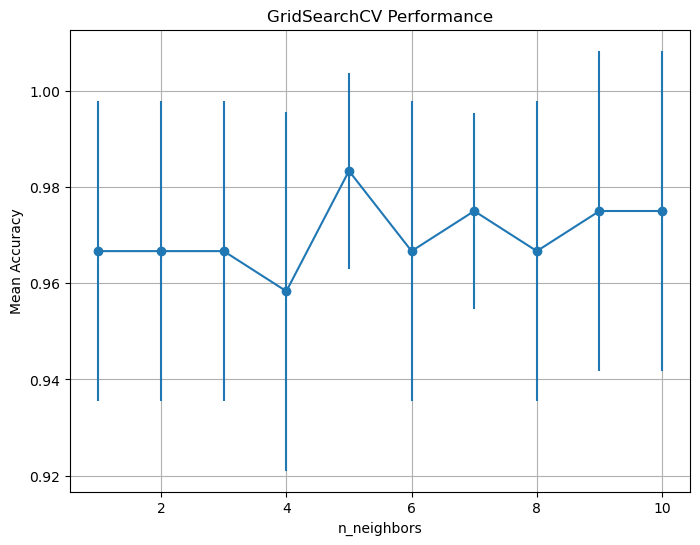

In [45]:
# Extract results 
cv_results = grid.cv_results_
means = cv_results['mean_test_score']
stds = cv_results['std_test_score']
params = cv_results['params']

# Plot mean accuracy scores along with standard deviations 
plt.figure(figsize=(8, 6))
plt.xlabel('n_neighbors')
plt.ylabel('Mean Accuracy')
plt.title('GridSearchCV Performance')
plt.grid()
plt.errorbar([p['n_neighbors'] for p in params], means, yerr=stds, fmt='o-')
plt.show()

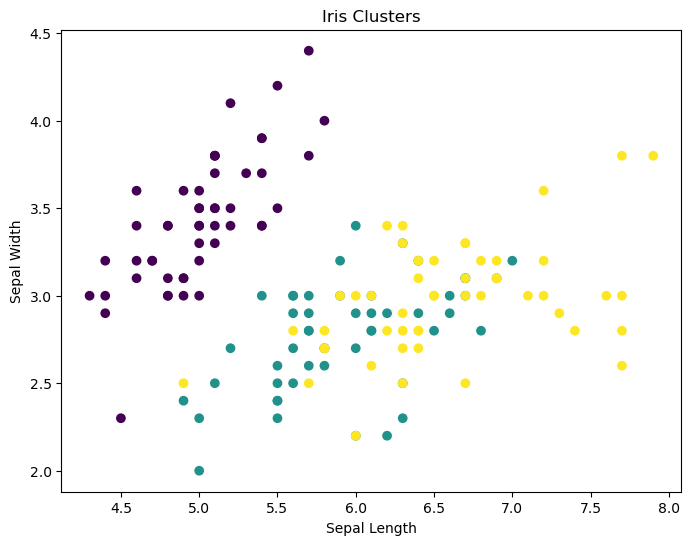

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Clusters')

plt.show()

## Example 2: Kaggle